In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import bs4
import lxml.etree as xml

In [2]:
url = 'https://www.worldometers.info/coronavirus/'
requests.get(url)

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 40,287,374 Cases and 1,118,396 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/
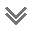

In [3]:
page = bs4.BeautifulSoup(requests.get(url, {}).text, 'lxml')
page

In [4]:
contcovid = page.find(name="tbody", attrs={"class": "body_continents"})
contcovid

<tbody class="body_continents">
<tr class="row_continent total_row" data-continent="North America" style="display: none">
<td></td>
<td><strong>Total:</strong></td>
<td>10,060,563</td>
<td style="background-color:#FFEEAA; color:#000;">+4,988</td>
<td>334,782</td>
<td style="background-color:red; color:#fff">+114</td>
<td>6,693,738</td>
<td style="background-color:#c8e6c9; color:#000">+3,691</td>
<td>3,032,043</td>
<td>18,965</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<td> </td>
<td></td>
<td></td>
</tr>
<tr class="row_continent total_row" data-continent="Asia" style="display: none">
<td></td>
<td><strong>Total:</strong></td>
<td>12,519,256</td>
<td style="background-color:#FFEEAA; color:#000;">+4,191</td>
<td>224,039</td>
<td style="background-color:red; color:#fff">+9</td>
<td>10,899,651</td>
<td style="background-color:#c8e6c9; color:#000">+8,504</td>
<td>1,395,566</td>
<td>20,725</td>
<td></td>
<

In [5]:
deadlist = []
for link in contcovid.find_all('tr'):
    name = link.find_all('td')[4]
    deadlist.append(int(name.text.replace(",",""))) 

In [6]:
reclist = []
for link in contcovid.find_all('tr'):
    name = link.find_all('td')[6]
    reclist.append(int(name.text.replace(",",""))) 

In [7]:
actlist = []
for link in contcovid.find_all('tr'):
    name = link.find_all('td')[8]
    actlist.append(int(name.text.replace(",",""))) 

In [8]:
deadlist.pop()
reclist.pop()
actlist.pop()

47

In [9]:
label = ["North America", "Asia", "South America", "Europe", "Africa", "Oceania"]

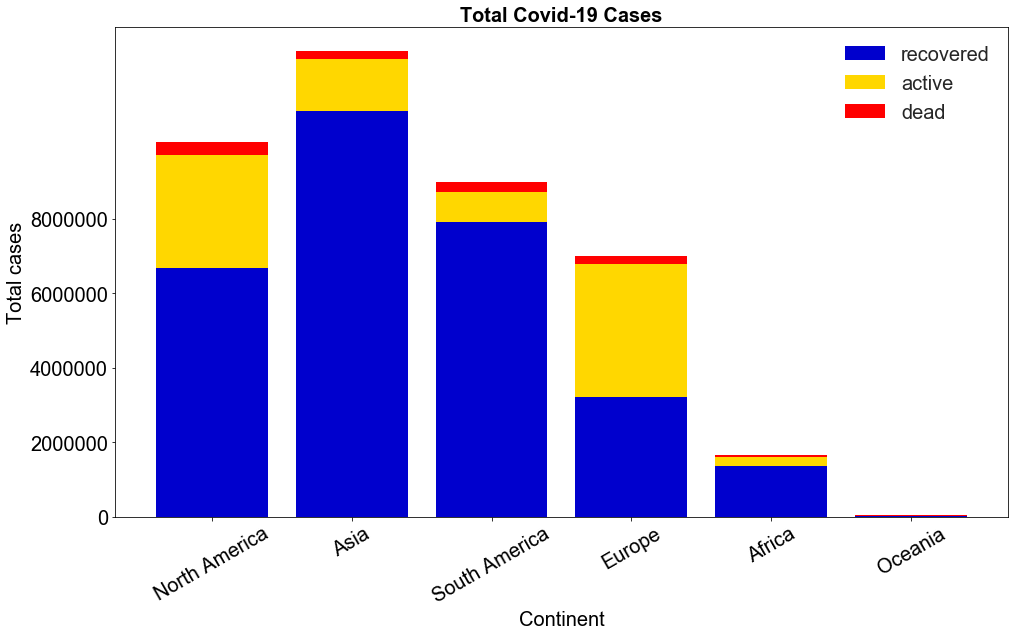

In [10]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 9))

plt.style.use("seaborn")
index = np.arange(len(label))
ax.bar(index, reclist, color="mediumblue", label="recovered")
ax.bar(index, actlist, bottom=np.array(reclist), color="gold", label="active")
ax.bar(index, deadlist, bottom=np.array(reclist)+np.array(actlist), color="red", label="dead")
ax.set_xlabel('Continent', fontsize=20)
ax.set_ylabel('Total cases', fontsize=20)
ax.set_title('Total Covid-19 Cases', fontsize=20, fontweight="bold")
plt.xticks(index, label, rotation=30, fontsize=20)
plt.yticks(np.arange(0, 10000000, 2000000), fontsize=20)
plt.legend(fontsize=20)
plt.show()